<a href="https://colab.research.google.com/github/Pkolekar940/EDA-ON-PLAY-STORE/blob/main/EDA_ON_PLAY_STORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App review analysis EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Pramod Kolekar

# **Introduction**

The Google Play Store is a huge platform of mobile applications, with millions of apps available for download. With such a huge variety of apps to choose from, it can be challenging for users to find the ones that best meet their needs. This is where exploratory data analysis (EDA) comes in, as it can help to identify patterns and trends in the data that can be used to make informed decisions about which apps to download.

In this project, we will be conducting EDA on a dataset of Google Play Store apps to gain insights into their features, categories, and user ratings. By analyzing this data, we can identify the most popular app categories, the features that are most important to users, and the factors that contribute to high user ratings.

To conduct my analysis, I used Python programming language and the Pandas library to clean and explore the Google Play Store dataset. I also used data visualization libraries such as Matplotlib and Seaborn to create visualizations that helped me understand the data better.

# **GitHub Link -**

https://colab.research.google.com/github/Pkolekar940/EDA-ON-PLAY-STORE/blob/main/EDA_ON_PLAY_STORE.ipynb

# **Problem Statement**


  We have given a row data of Playstore from that row data we have to do cleaning the data and mining the data we will try to find some hidden pattern, trend of data and insights. With the help of our research we will give some suggestion to the application developer.

1. Content Rating Distrubution by age.

2. Distribution of Free and Paid App.

3. Distribution of Free and Paid App by install.

4. Number of Apps in each Category.

5. Number of Installs for each category.

6. Rating Distribution.

7. What is the most popular app category in terms of the number of downloads?

8. Percentage Distribution per category.

9. Average Price of Installation for each category.

10. What is the top 10 most downloaded apps from GAMES category?

11. Top 10 Highest earning Apps

12. App Prices vs. Rating.

13. Distribution of apps in terms of their Rating, Size and Type.

14. Most Popular size

15. Correlation

16. Pair Plot

17. Top apps with the highest number of POSITIVE reviews and categories.

18. Top apps with the highest number of NEGATIVE reviews and categories.

19. Top 10 Apps with Highest Negative Sentimental Reviews.

20. Distribution of type of reviews.

21. Sentiment Analysis by Category.

22. Percentage of Review Sentiments.



# Data Prepartion

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math


#  Import Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import rcParams

# Importing datetime modules
from datetime import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore')

# Allow mathplotlib to plot inline with frontends
%matplotlib inline

##Let's load the data

In [ ]:
# Load the database
url='https://drive.google.com/file/d/1pVZNhpwbqbu3xLf6J-1KrQI_-B8KqDCt/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
# Load the database
url='https://drive.google.com/file/d/1zJmyrNtkv_ZnVAY1wtg1irTRbpoZ9rRH/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url)

# Know Your Data

In [ ]:
# Let's get the dimensions (i.e., the number of rows and columns)
print(f'The rows and columns in playstore data is {df.shape}')

The rows and columns in playstore data is (10841, 13)


In [ ]:
print(f'The rows and columns in user data is {df1.shape}')

The rows and columns in user data is (64295, 5)


###Dataset Information

In [ ]:
# Dataset Info
# Playstore Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# User dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# look at the random 5 records in the playstore dataframe
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5574,MARCA - Diario Líder Deportivo,SPORTS,3.9,76340,14M,"5,000,000+",Free,0,Everyone,Sports,"July 25, 2018",6.3.3,4.1 and up
9685,Bluetooth Pair,TOOLS,3.5,1960,2.7M,"1,000,000+",Free,0,Everyone,Tools,"August 4, 2018",2.5,4.1 and up
4173,"G Theme 2 for LG V30, LG G6",PERSONALIZATION,4.3,25,15M,500+,Paid,$1.49,Everyone,Personalization,"December 13, 2017",1.0.2,7.0 and up
5197,Tomo A.i. Pet Chat Bot,FAMILY,3.3,40,3.6M,"1,000+",Free,0,Everyone,Entertainment,"May 15, 2017",1.0,4.0.3 and up
5514,ClanHQ,COMMUNICATION,2.7,560,37M,"10,000+",Free,0,Everyone,Communication,"July 25, 2018",1.0.21,4.4 and up


In [ ]:
# look at the random 5 records in the user dataframe
df1.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
55396,Google Classroom,NaN,NaN,NaN,NaN
42084,FERZU - Furries Social Network,It's bad im trying login wont let login,Negative,-0.700000,0.666667
37977,EMT Tutor NREMT-B Study Guide,NaN,NaN,NaN,NaN
4224,Adobe Acrobat Reader,It common functions I acrobat PC. For joint us...,Positive,0.033333,0.394444
43605,Family GPS Tracker and Chat + Baby Monitor Online,"Good app, walkie talkie little wonky sometimes...",Positive,0.294643,0.542857


In [ ]:
# Dataset Describe returns descriptive statistics of the dataframe
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [ ]:
df['Rating'].median()

4.3

<Axes: >

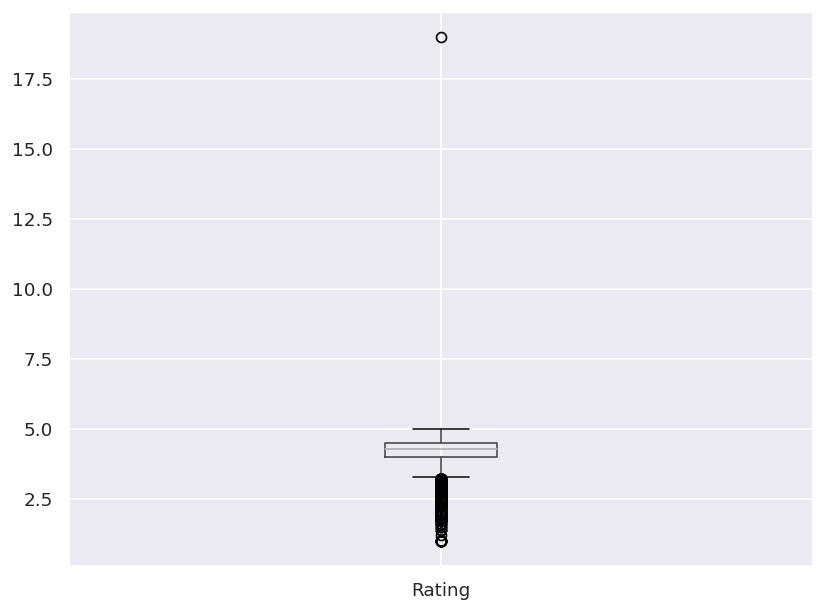

In [ ]:
# let's plot boxplot in order to find is there any outliers in your data
df.boxplot()

##### 1. Why did you pick the specific chart?


Because boxplot can help to find potentaial outlier and how much spread our dataset.

##### 2. What is/are the insight(s) found from the chart?


We can clearly see here in our one row Rating is mentioned 19 which is not possible so we have to removed it.

In [ ]:
# here we have some outlier let's cheak
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# Let's drop that outlier
df.drop([10472],axis=0,inplace=True)

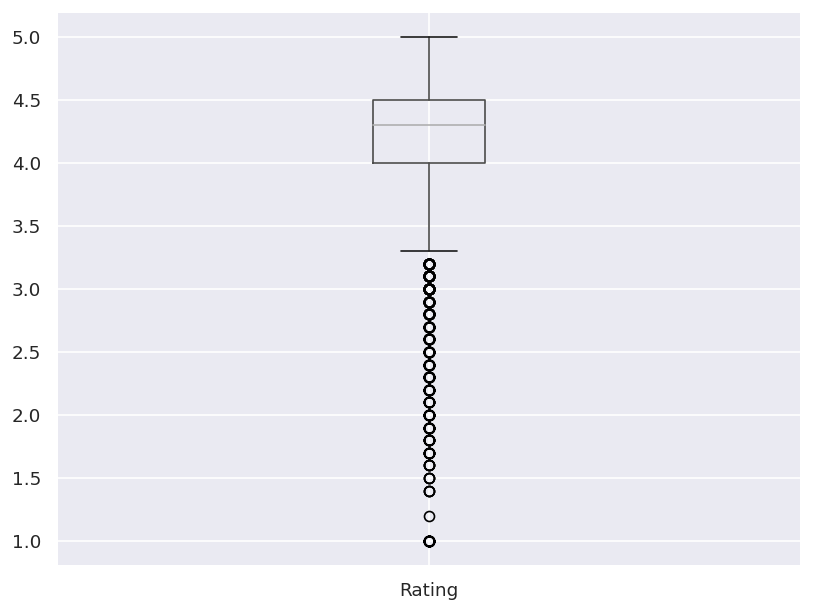

In [ ]:
# Just to crosscheck
df.boxplot();

##### 1. Why did you pick the specific chart?

Just to insure we again plot this graph again.

##### 2. What is/are the insight(s) found from the chart?


we can clearly see here after removing our outlier boxplot also looking normal.

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

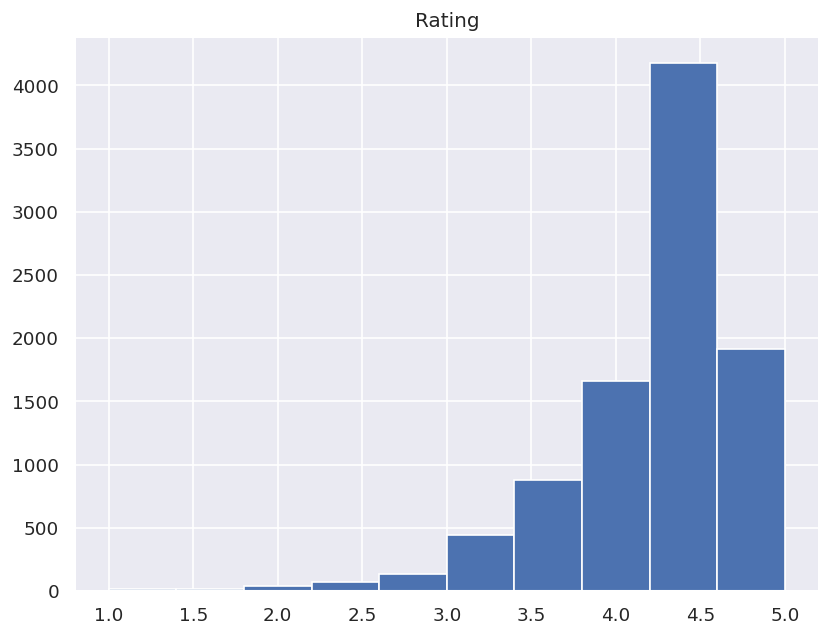

In [ ]:
# Let's look at visualizing the distribution of data in a dataset
df.hist()

##### 1. Why did you pick the specific chart?

Histogram useful for identifying patterns, modes, and assessing symmetry and skewness.

##### 2. What is/are the insight(s) found from the chart?


We can in our dataset by this histogrm our mode is 4.3 and our data right skew.

<Axes: >

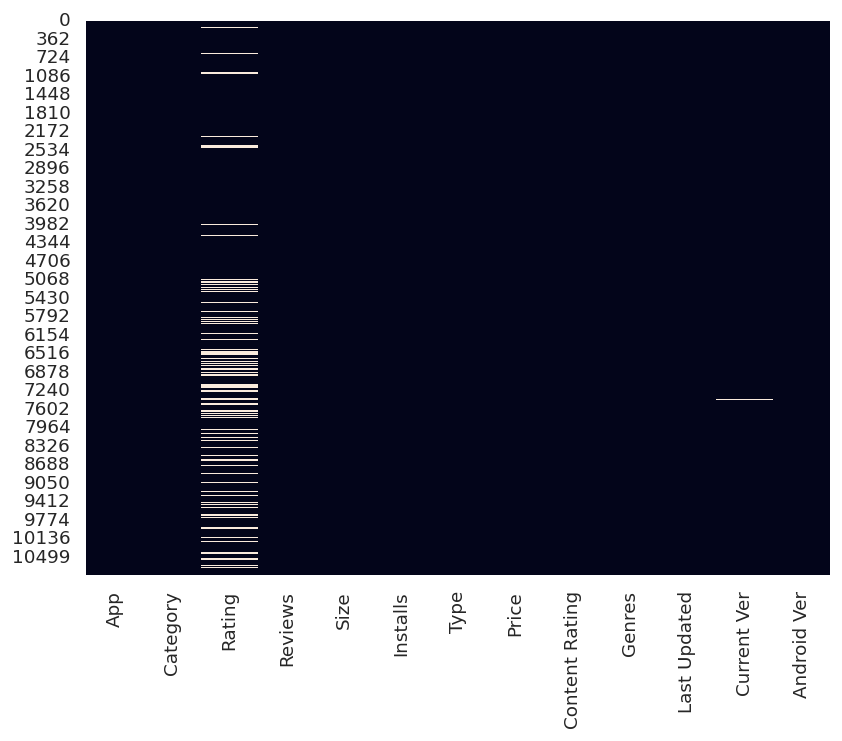

In [ ]:
# Let's Visualizing the missing values
# to visualize missing data we can use the heatmap method.

# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(8,6)})
sns.heatmap(df.isnull(), cbar=False)

##### 1. Why did you pick the specific chart?

Heatmap are popular to visualization tool for exploring the large dataset especially when we are dealing with missing data

##### 2. What is/are the insight(s) found from the chart?


In playstore dataset we have lots of missing values in our rating column.

In [ ]:
# Let's find missing data percentage
df.isnull().sum()/len(df)*100

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073801
Android Ver        0.018450
dtype: float64

# Data Manipulation

In [ ]:
df['Rating'].median()

4.3

In [ ]:
'''The function replaces any missing values in the Series with the
median value of the non-missing values in the Series, using the fillna() method.'''
def imput_median(serias):
  return serias.fillna(serias.median())

In [ ]:
# Let's apply fillna function to our Rating column
df['Rating']=df['Rating'].transform(imput_median)

If you use the transform() method instead of the apply() method to apply the impute_median() function, you will not encounter the AttributeError that you saw with the apply() method.
This is because the transform() method applies the function to each group defined by the grouping criterion (in this case, the whole "Rating" column), whereas the apply() method applies the function to each element of the Series individually. Therefore, if there are NaN values in the Series, the transform() method will automatically skip them and calculate the median only for the non-NaN values, without throwing an error.

In [ ]:
# Let's convert Rating column object into float
df['Rating'] = df['Rating'].astype(float)

In [ ]:
df['Type'].mode()

0    Free
Name: Type, dtype: object

In [ ]:
# Let's fill the null values with the mode values
df['Type'].fillna(df['Type'].mode()[0],inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

The mode is the value that appears most frequently in a column, and it represents the central tendency of the distribution for categorical data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [ ]:
# Let's find null value after applying transformation method
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5353,Amazon for Tablets,SHOPPING,4.0,141584,22M,"10,000,000+",Free,0,Teen,Shopping,"July 31, 2018",16.14.0.850,4.4 and up
649,Healthy Relationships Guide,DATING,4.3,0,8.2M,1+,Free,0,Everyone,Dating,"July 31, 2018",2.0,4.0.3 and up
1351,The Bump Pregnancy Tracker,HEALTH_AND_FITNESS,4.6,20301,22M,"1,000,000+",Free,0,Everyone,Health & Fitness,"May 16, 2018",3.22,4.3 and up
10271,FC Red Bull Salzburg App,SPORTS,4.5,1526,89M,"50,000+",Free,0,Everyone,Sports,"August 7, 2018",4.0.4-R,5.0 and up
1180,Sumine side dish - dish recipe side dish,FOOD_AND_DRINK,4.3,82,4.9M,"10,000+",Free,0,Everyone,Food & Drink,"June 23, 2018",1.1,4.1 and up


In [ ]:
# Let's removes from Installs column the comma sign, plus sign and convert object into interger form
df['Installs']=df['Installs'].str.replace(',','').str.replace('+','').astype(int)

In [ ]:
# Let's removes the dollar sign from the 'Price' column of a Pandas DataFram and convert object into float form
df['Price'] = df['Price'].str.replace('$', '').astype(float)


In [ ]:
# Let's convert Reviews columns object into intger form
df['Reviews']=df['Reviews'].astype(int)

In [ ]:
# Let's replace NaN value in Android ver to Varies with device
df['Android Ver'].fillna('Varies with device', inplace=True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Let's converts the string values in the Size column of a DataFrame df to float values by converting everything in MB
df['Size']=[float(size[:-1]) if size.endswith('M') else float(size[:-1]/1024) if size.endswith('K') else None for size in df['Size']]

This code converts the string values in the Size column of a DataFrame df to float values, by removing the last character from each string value and dividing by 1024 if the string ends with 'k', or leaving as is if the string ends with 'M'. The resulting float values are stored in the Size column of df. If a value in the Size column is None or does not end with 'k' or 'M', it is replaced with None.

In [ ]:
# Let's find out null values percentage in column size
df['Size'].isnull().sum()/len(df)*100

18.551660516605168

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            8829 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,8829.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,22.270540,1.546434e+07,1.027368
std,0.480342,2.927761e+06,22.628691,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.400000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,31.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# Handling duplicate values

In [ ]:
# we have to find out app with similar name
df1['App'].value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

In [ ]:
# dropping duplicates from the 'App' column.
df.drop_duplicates(subset = 'App', inplace = True)
df.shape

(9659, 13)

In [ ]:
df.shape

(9659, 13)

In [ ]:
# Let's sort the value ny Intalls, Rating and Reviews.
df[df['Price']==0.0].sort_values(['Installs','Rating','Reviews'],ascending=[False, False, False]).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,NaN,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


Important finding
* If we see in oder to installs ,rating and review then we can see the instagram have lot of user from this study we could understand that we have see the feature of instagram which are able to influnce the people



---



# Exaploratory Analysis and Visualization

## Chart 01 --->  Let's find From the Content Rating column which category apps are found more on playstore



In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

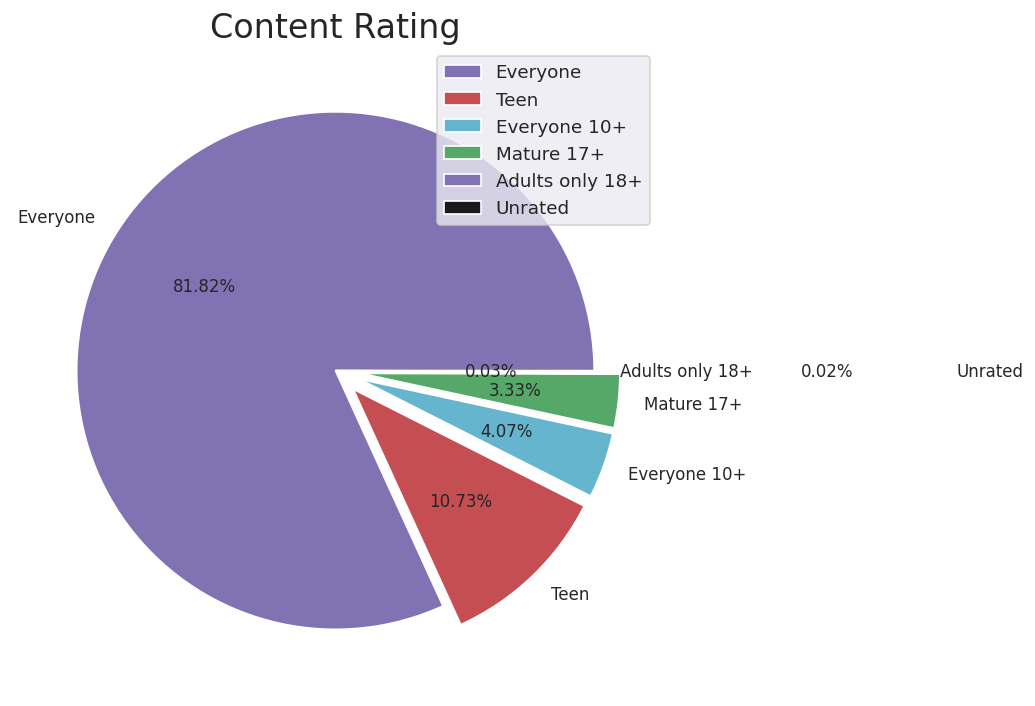

In [ ]:
# Content rating of the apps
data = df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

# Let's create pie chart
plt.figure(figsize=(9,7))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%' ,explode=explode,textprops={'fontsize': 10})
plt.title('Content Rating',size=20,loc='center')

plt.legend()


##### 1. Why did you pick the specific chart?

Pie charts provide a simple and intuitive way to visualize the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Answer:

* The majority of the apps on the play store have a content rating of "Everyone", with a share of 81.8%.

* The remaining content ratings, i.e., "Everyone 10+", "Teen", "Mature 17+", and "Adults only 18+", have a significantly lower share.

* The content rating "Adults only 18+" has the smallest share, with only 0.03% of apps falling under this category.

* The content rating "Unrated" has an almost negligible share of 0.02%.

## Chart 02 --->  Distribution of Free & Paid Apps

In [ ]:
# Let's groupby free and paid application in order to find number
app_type=df.groupby('Type')[['App']].count().reset_index()
app_type

,Type,App
0,Free,8903
1,Paid,756


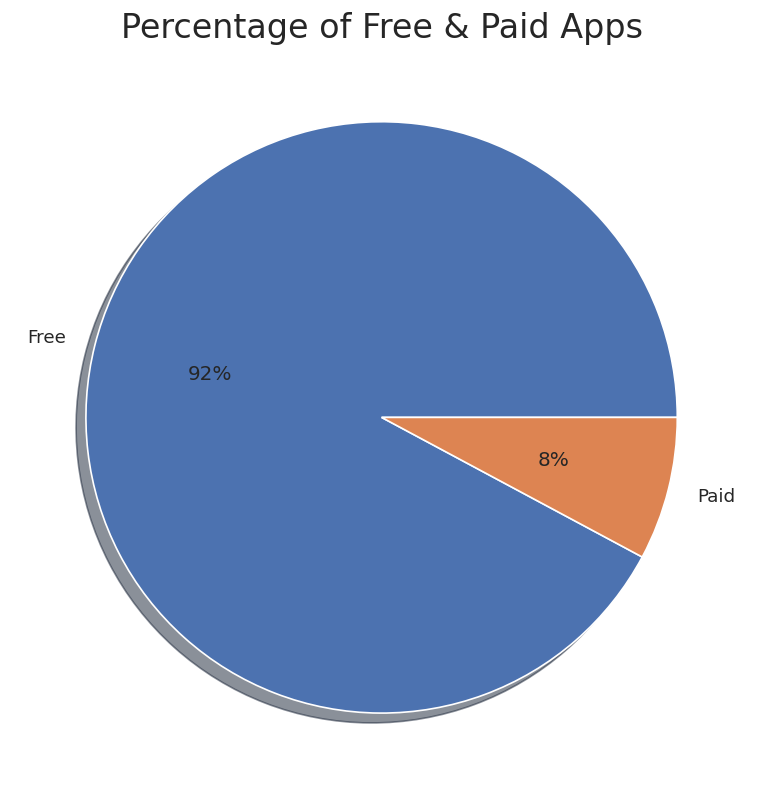

In [ ]:

# Create a new figure and axis object with a larger figure size
fig, ax = plt.subplots(figsize=(10, 8))

label_names = ['Free', 'Paid']

# Let's Plot the data as a pie chart
ax.pie(app_type['App'], labels=label_names, autopct='%1.00f%%', shadow=True, startangle=0)

# Set the title
ax.set_title('Percentage of Free & Paid Apps', fontsize=20)

# Show the chart
plt.show()


##### 1. Why did you pick the specific chart?

Showing the proportion of each category of groups as part of a whole and it's very handy to use

##### 2. What is/are the insight(s) found from the chart?

92 per cents application are free of cost and only 8 per cents application are paid

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Positive Impact:

we must understand 92 per cents applications are free of cost and people also like to use free of cost

Negative Impact:

It's very difficult to gerate revunue from playstore so we have take care about performance of application to get good reviews.

## Chart 03 --->  Percentage of Paid and Free app installs

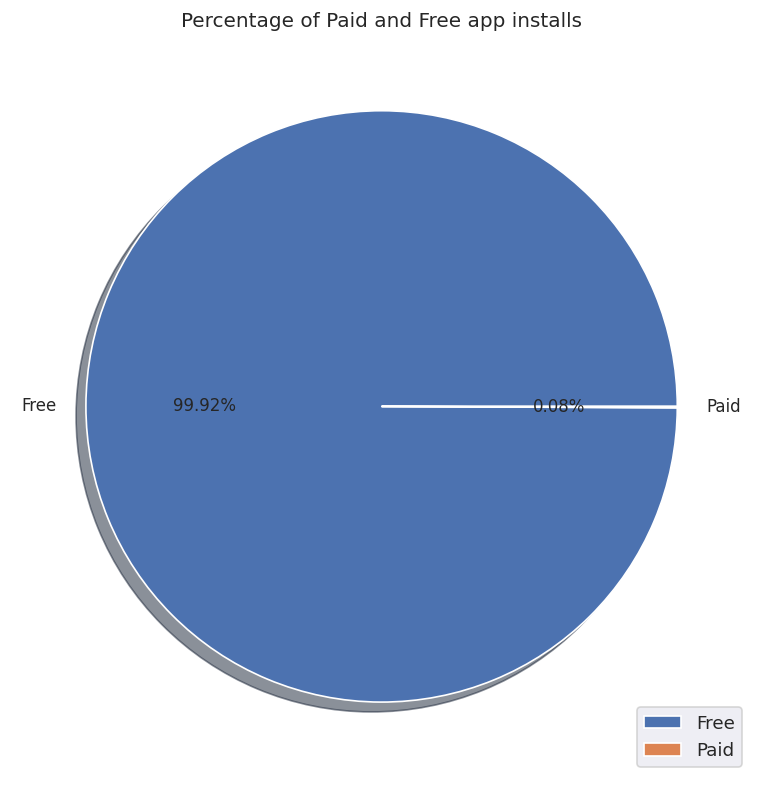

In [ ]:
# Let's Extracting number of installs in free and paid app types

free_paid_install = df.groupby(['Type'])['Installs'].sum()

# Ploting pie chart

plt.figure(figsize=(10,8))
plt.pie(free_paid_install, labels = label_names,autopct='%.2f%%',textprops={'fontsize': 10},shadow=True)
plt.title('Percentage of Paid and Free app installs',size=12,loc='center')
plt.legend(loc='lower right')
plt.show()

##### 1. Why did you pick the specific chart?


The pie chart can show the proportion of paid and free apps in the market.

##### 2. What is/are the insight(s) found from the chart?


1) We can clearly see here out of 92% free application 99.92% It's been installed by user. While only 8% of the apps available are of paid type with 0.08% of downloads.




2) If developer planning to launch new app its quite obvious that chances of good revenue generation from paid app is quite less,


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

positive business impact: From the pie chart given above we can easily notice that audience are more likely to interested in FREE apps as compared to PAID apps.
along with that the pie chart also shows the level of competition in Paid app category is very less as compared to FREE apps as compition is tough and developer have to work hand in order to stand out in the market.

Negative business impact:As from Installs pie chart percentage of installs for paid apps is 0.08% only. Hence,it is quite difficult for PAID apps to reach huge user base because user preference is more towards FREE apps.

## Chart 04 --->  Number of Apps in each Category



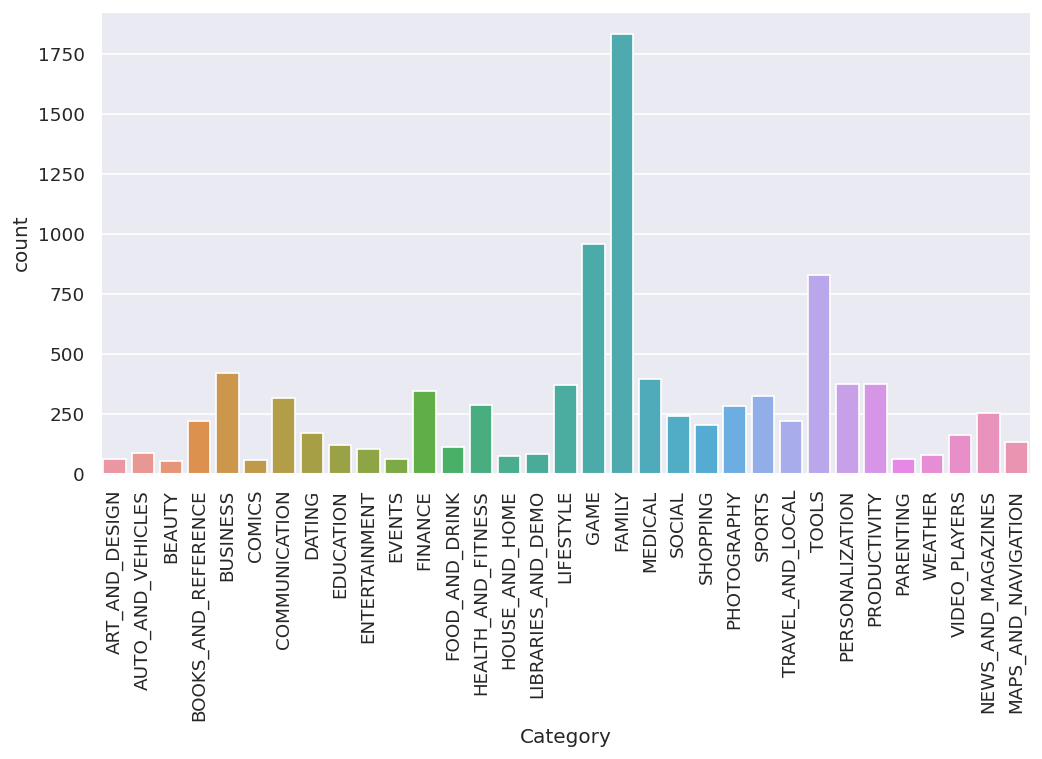

In [ ]:
# Let's create a count plot of the number of apps in each category
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
ax = sns.countplot(x = 'Category', data = df)

# Let's rotate columns name in verticle otherwise we won't be able to see because of overlapping
plt.xticks(rotation=90)
plt.show()

# Let's set title , x and y labelsze = 16)

#### 1. Why did you pick the specific chart?

To comparing data across categories and it's looks very attractive in order to study or comparing.

## Chart 05 ---> Number of Installs For Each Category

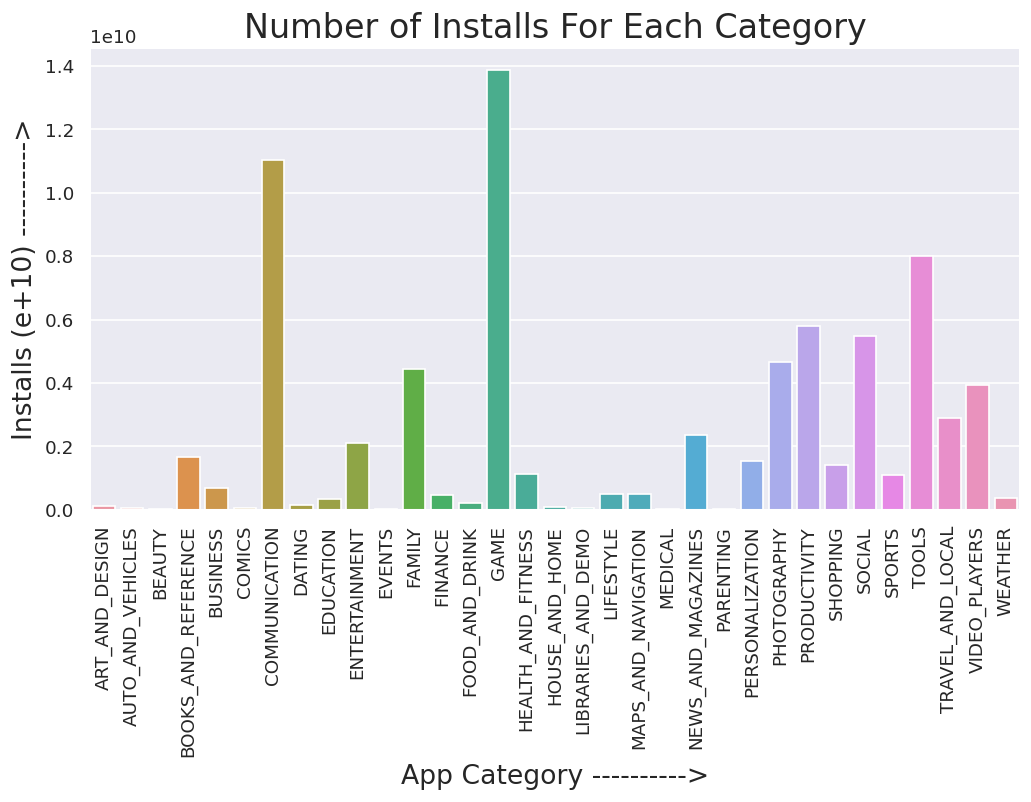

In [ ]:
# Let's create count plot of the number of installs for each category

categories = df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum().reset_index()   # To covert group by objects into dataframe

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Category', y = 'Installs', data=category_installs_sum_df)

plt.xticks(rotation = 90)
plt.xlabel('App Category ---------->', size = 16)
plt.ylabel('Installs (e+10) ---------->', size = 16)
plt.title('Number of Installs For Each Category', size = 20)

plt.show()

##### 1. Why did you pick the specific chart?

 Bar graphs are easy to read and understand, making them a popular choice for presenting data in reports and presentations.

##### 2. What is/are the insight(s) found from the chart?



Most of the apps in Play Store belongs to the category of 'Family', 'Game' and 'Tools'.


## Chart 06 ---> Rating Distribution

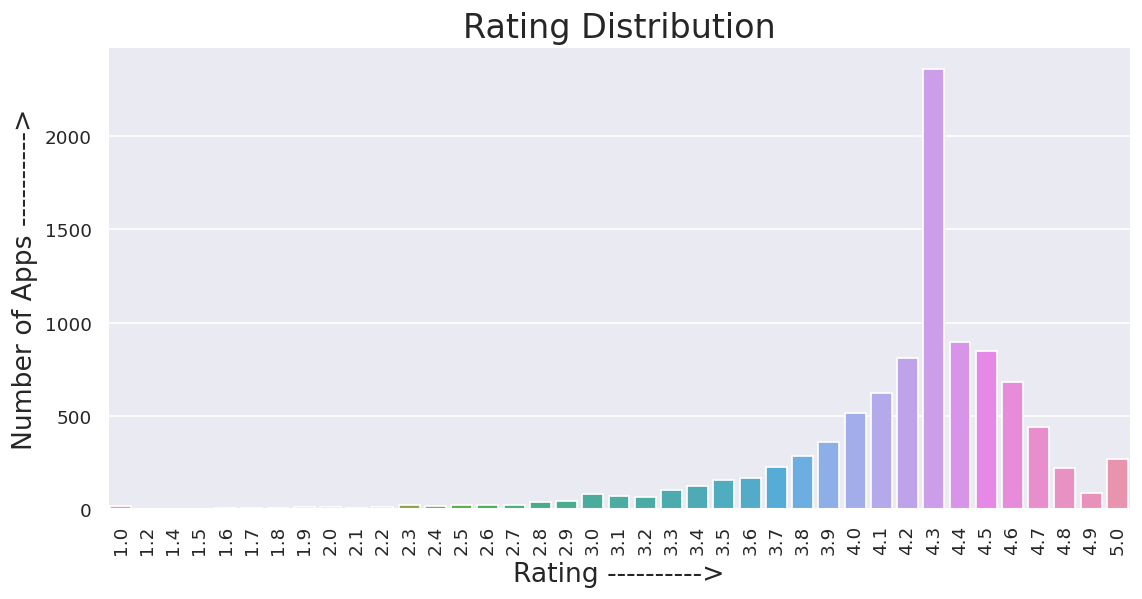

In [ ]:
# DISTRIBUTION OF RATING

plt.figure(figsize = (11, 5))
sns.countplot(x = 'Rating', data = df)

plt.title('Rating Distribution', size = 20)
plt.xticks(rotation = 90)
plt.xlabel('Rating ---------->', size = 16)
plt.ylabel('Number of Apps ---------->', size = 16)

plt.show()

##### 1. Why did you pick the specific chart?

 Bar graphs are easy to read and understand, making them a popular choice for presenting data in reports and presentations.

##### 2. What is/are the insight(s) found from the chart?

Most of the application getting rating from 4 to 4.7


## Chart 07 ---> What is the most popular app category in terms of the number of downloads?

In [ ]:
# Let's identify category wise Installs
most_download=df.groupby('Category')[['Installs']].sum().reset_index()

In [ ]:
# Let's see our output
most_download

,Category,Installs
0,ART_AND_DESIGN,114338100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665969576
4,BUSINESS,697164865
5,COMICS,44981150
6,COMMUNICATION,11038276251
7,DATING,140926107
8,EDUCATION,352952000
9,ENTERTAINMENT,2113660000


In [ ]:
# Let's add new column "Percentage" in our category
most_download['Percentage']=((most_download['Installs']/most_download['Installs'].sum())*100).round(2)

In [ ]:
# Let's arrange the most download value in ascending order
most_download.sort_values(by='Installs',ascending=False)

,Category,Installs,Percentage
14,GAME,13878924415,18.47
6,COMMUNICATION,11038276251,14.69
29,TOOLS,8001771915,10.65
25,PRODUCTIVITY,5793091369,7.71
27,SOCIAL,5487867902,7.31
24,PHOTOGRAPHY,4649147655,6.19
11,FAMILY,4427941505,5.89
31,VIDEO_PLAYERS,3926902720,5.23
30,TRAVEL_AND_LOCAL,2894887146,3.85
21,NEWS_AND_MAGAZINES,2369217760,3.15


# Chart 8 ---> Percentage Distribution per category

In [ ]:

# Let's create the line chart using Plotly
fig = px.bar(most_download, x='Percentage',y='Category', title='Percentage Distribution per category',width=1200, height=600)
fig.update_traces(marker={'color':'red'})
fig.show()

##### 1. Why did you pick the specific chart?

 With the help of barchart here we can comparing data across categories. and here we can it's look very well

##### 2. What is/are the insight(s) found from the chart?

* Most of the Apps available on playstore are from GAMES category having 13878924398 downloads and 18.5% of proportion.

* Only 15973161 downloads are done from EVENT category having share of 0.021263%.


In [ ]:
# Applying groupby on category column and get mean price of each category
category_avg_price=df.groupby('Category')[['Price']].mean().reset_index()

In [ ]:
# Sorting average prices by descending order
category_avg_price.sort_values(by='Price',ascending=False)

,Category,Price
12,FINANCE,8.408203
18,LIFESTYLE,6.398022
20,MEDICAL,2.520759
10,EVENTS,1.718594
11,FAMILY,1.309967
25,PRODUCTIVITY,0.670936
3,BOOKS_AND_REFERENCE,0.539505
24,PHOTOGRAPHY,0.420925
4,BUSINESS,0.417357
32,WEATHER,0.410380


## Chart 9 ---> Average Price of Installation for each category

Text(0.5, 1.0, 'Average Price of Installation for each category')

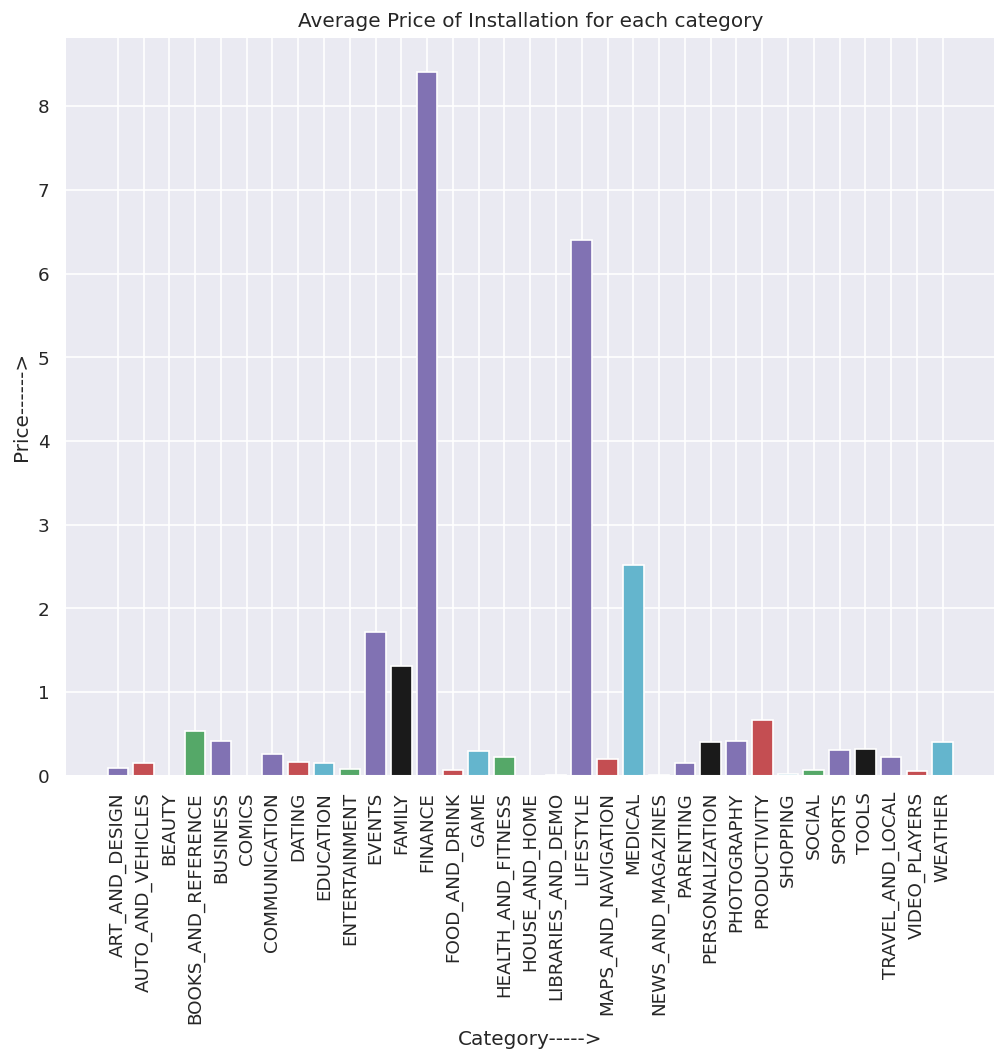

In [ ]:
# Let's Set the figure size
plt.figure(figsize=(10, 8))

# Let's Plot the bar chart
plt.bar(category_avg_price['Category'], category_avg_price['Price'], color=colors)
plt.xticks(rotation=90)
plt.xlabel('Category----->')
plt.ylabel('Price------>')
plt.title('Average Price of Installation for each category')



##### 2. What is/are the insight(s) found from the chart?


* FINANCE category having highest average price i.e. $ 8.4

* LIBRARIES_AND_DEMO category having lowest average price $ 0.011786
and COMICS, BEAUTY ,HOUSE_AND_HOME are available free.




## Chart 10 --->  What is the top 10 most downloaded apps from GAMES category?

In [ ]:
# Selects the top 10 games based on the number of installs from the dataframe
top_games=df[df['Category']=='GAME'].sort_values(by='Installs',ascending=False).head(10)
top_games

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609,62.0,500000000,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308,24.0,500000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223,NaN,500000000,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4052,Bike Race Free - Top Motorcycle Racing Games,GAME,4.5,2586261,NaN,100000000,Free,0.0,Everyone,Racing,"July 31, 2018",7.7.9,4.2 and up
1737,Talking Tom Gold Run,GAME,4.6,2698348,78.0,100000000,Free,0.0,Everyone,Action,"July 31, 2018",2.8.2.59,4.1 and up
1736,Roll the Ball® - slide puzzle,GAME,4.5,1385093,35.0,100000000,Free,0.0,Everyone,Puzzle,"August 2, 2018",1.7.40,4.1 and up
4043,Vector,GAME,4.4,3058687,89.0,100000000,Free,0.0,Everyone 10+,Arcade,"July 18, 2016",1.2.0,4.0 and up


In [ ]:
# Let's Plot in order to find Most downloaded Games on the Play store

fig = px.bar(top_games, x='Installs', y='App', color='App',
             title='Most Downloaded GAMES on the Play Store',
             width=1200, height=600,
             color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_traces(marker_line_width=0.5)

fig.show()


##### 1. Why did you pick the specific chart?

Bar graph simple and easy to understand, making them accessible to people with different levels of expertise in data analysis.

##### 2. What is/are the insight(s) found from the chart?

* Most downloaded App from game category is **Subway Surfers** with 1 Billion+ downloads followed by Candy Crush Saga, My Talking Tom.

* .All of the top 5 most downloaded games on the Play Store have 500 million+downloads, indicating a high level of popularity among users.

*  All of the top 10 games are free to download, but generate revenue through in-app purchases and/or ads.

* Most of the top 10 games have EVERYONE content rating.





In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Chart 11  ---> Top 10 Highest earning Apps


In [ ]:
# Let's  calculate the total revenue generated by Paid apps
df['Revenue']=df['Installs']*df['Price']

In [ ]:
# To find out top 10 highest earning apps
highest_earning_df=df.sort_values(by='Revenue',ascending=False)[['App','Price','Installs','Revenue']].head(10)
highest_earning_df

,App,Price,Installs,Revenue
2241,Minecraft,6.99,10000000,69900000.0
5351,I am rich,399.99,100000,39999000.0
5356,I Am Rich Premium,399.99,50000,19999500.0
4034,Hitman Sniper,0.99,10000000,9900000.0
7417,Grand Theft Auto: San Andreas,6.99,1000000,6990000.0
2883,Facetune - For Free,5.99,1000000,5990000.0
5578,Sleep as Android Unlock,5.99,1000000,5990000.0
8804,DraStic DS Emulator,4.99,1000000,4990000.0
4367,I'm Rich - Trump Edition,400.00,10000,4000000.0
4362,💎 I'm rich,399.99,10000,3999900.0


In [ ]:
# Let's visualization code
import plotly.express as px
# let's Create a bar plot using plotly
fig = px.bar(highest_earning_df[::-1], x='Revenue', y='App',title='Top 10 Highest earning Apps',color='App')

fig.show()

##### 1. Why did you pick the specific chart?

Easy to understand and The height or length of the bars represents the numerical value of the data being displayed.

##### 2. What is/are the insight(s) found from the chart?

* Minecraft app is highest earning app having revenue about 69.9 M USD $.
* I am rich plus is the lowest earnig app among top 10.

* Total revenue generated by all top 10 apps is 171.75 M USD $.

* Expensive apps like I am Rich, I Am Rich Premium, I'm Rich - Trump Edition, and I am Rich Plus have low installs and are not sustainable due to their high price. This pricing strategy may lead to negative reviews and harm brand reputation.

## Chart 12  ---> App Prices vs. Rating

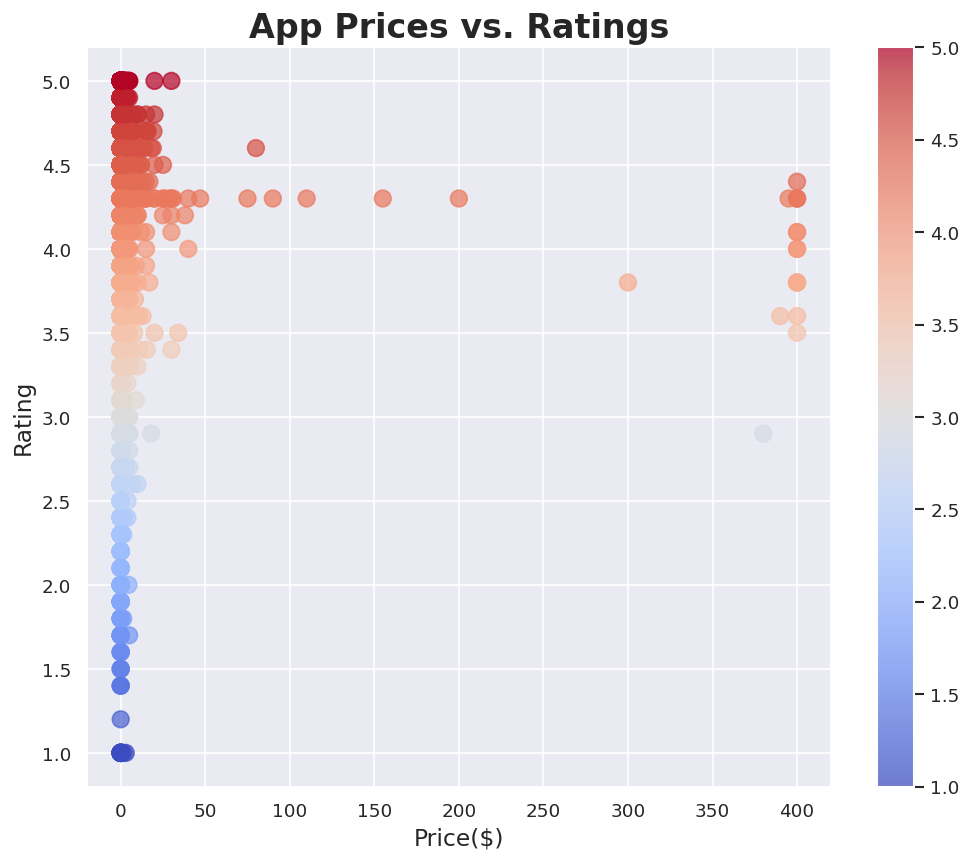

In [ ]:
# Let's plot a scatter plot apps prices vs rating

plt.figure(figsize=(10, 8))
plt.scatter(x='Price', y='Rating', data=df, alpha=0.7, cmap='coolwarm', c='Rating', s=100)
plt.colorbar()
plt.title('App Prices vs. Ratings', fontsize=20, fontweight='bold')
plt.xlabel('Price($)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer:

1) Displaying the relationship between two continuous variables. Useful for identifying pattern, trends, and outliers in the data.




* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### 2. What is/are the insight(s) found from the chart?

1)   Most of the free apps are small in size (within 40 MB).

2)  Most of the high rating apps are also smaller in size.

## Chart 13 ---> Distribution of apps in terms of their Rating, Size and Type

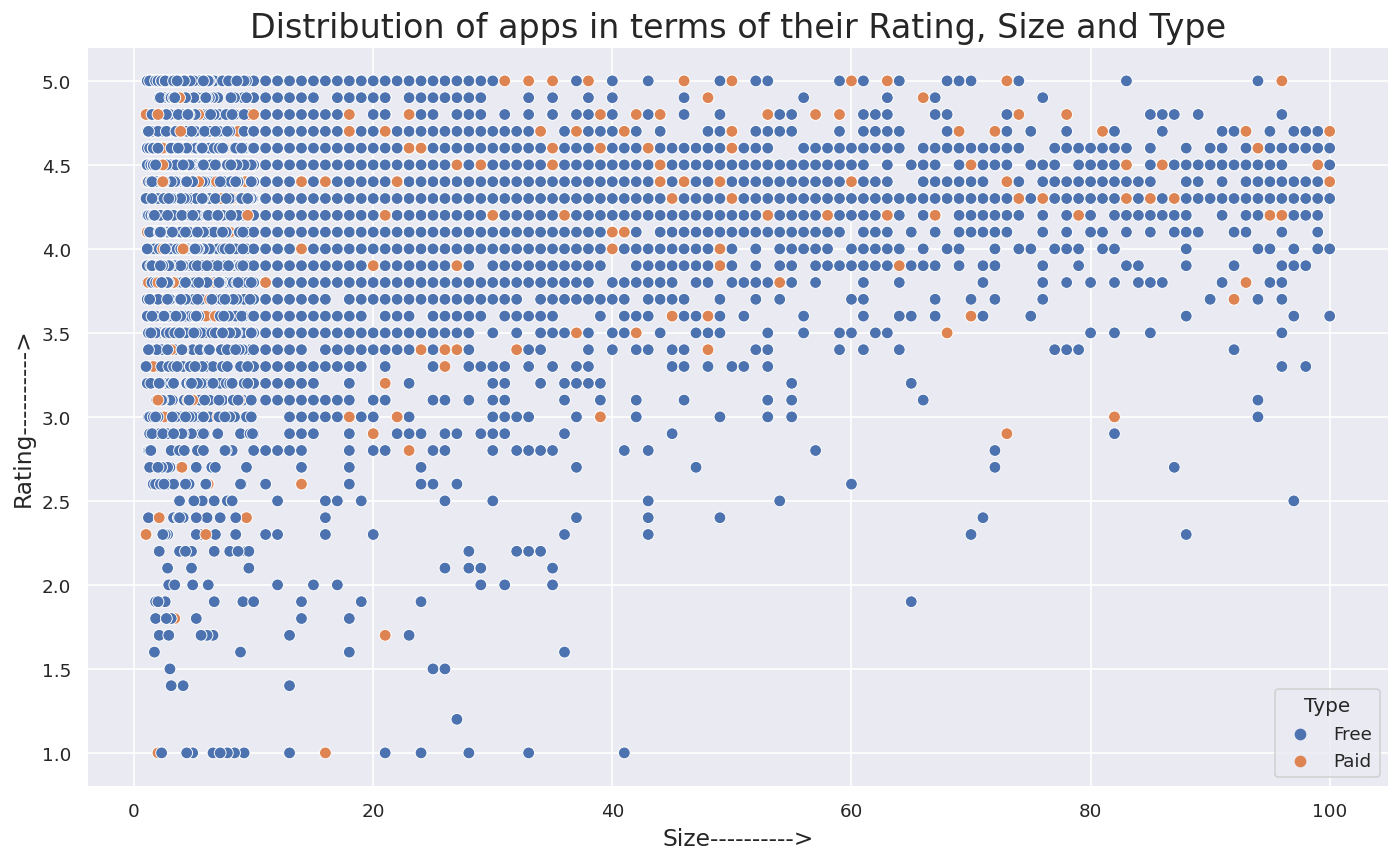

In [ ]:
# Let's plot the graph of Ditributin of apps in terms of their rating, size and type

plt.figure(figsize=(14, 8))
sns.scatterplot(x='Size', y='Rating', hue='Type', data=df, s=50)
plt.title('Distribution of apps in terms of their Rating, Size and Type', size=20)
plt.xlabel('Size---------->', size=14)
plt.ylabel('Rating---------->', size=14)
plt.show()


##### 1. Why did you pick the specific chart?

Answer:

To Distrubuting relationship between two Rating , size and type Scatter plot should be one of the most choice because it useful for identifying patterns, trends and outlier in the data.

##### 2. What is/are the insight(s) found from the chart?

Answer:
1.  Most of the apps available on Playstore are FREE (Price $0) having rating within range 3.5 to 4.5.

2.  Most of the apps lies in the $$0 to $30 range.
3.  Very few apps available on playstore which costs high($300 to $500)
4.  Majority of apps having ratings from 3 to 5 which indicates that most of the apps are well liked  by users irrespective of price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:

Positive Impact: The data suggests that paid apps more likely to have higher ratings as compared to FREE apps.
developers to focus on developing paid apps that offer more features and better quality in order to maintain reputation in market.

Negative Impact: The wide range of prices for paid apps can make it difficult for users to find apps within their budget, leading to frustration and lower app downloads.
Outliers in the data suggest that some apps are not providing good value for money, leading to negative reviews and a decline in user trust.

#Chart 14 ---> Most Popular size

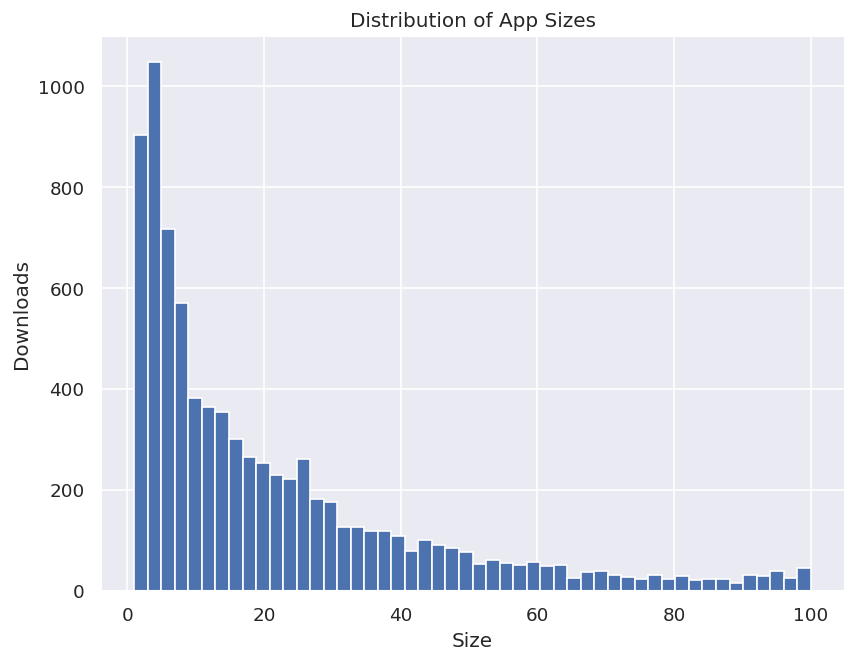

In [ ]:

# Let's Plotting a histogram of the app sizes

plt.hist(df['Size'], bins=50)

# Customize the chart appearance and layout
plt.title('Distribution of App Sizes')
plt.xlabel('Size')
plt.ylabel('Downloads')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?


Answer.
The histogram of app sizes can provide several insights into the distribution of app sizes in the dataset

##### 2. What is/are the insight(s) found from the chart?

Answer:
1.  Most of the apps have a size less than 40 MB, and there are very few apps that have a size greater than 60 MB.
2. From the histogram it is clearly visible that the size data is skrewed at right side which indicates more apps with small size, and fews apps with large size is available on playstore.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive impact: As from histogram it is clear that apps which are less than 50 MB have more downloads. Develper should focus on reducing app size while launching any application so that its easy to download & takes less time for installation and ultimately it will help to increase the business.



Negative impact: As number of installs are very less when size of app is more than 60 or 70 MB, it indicates that users are more likely to download apps with small size. Maybe its due to more installation time or limited storage capacity of device, which leads to negative reviews and less ratings.

## Chart 15 ---> **Correlation**

In [ ]:
# Let's calculates the pairwise correlation between columns of a Playstore Dataframe
df.corr()

,Rating,Reviews,Size,Installs,Price,Revenue
Rating,1.000000,0.050207,0.038010,0.034307,-0.018662,0.006782
Reviews,0.050207,1.000000,0.177899,0.625165,-0.007598,0.007449
Size,0.038010,0.177899,1.000000,0.131732,-0.021916,-0.001423
Installs,0.034307,0.625165,0.131732,1.000000,-0.009405,-0.003082
Price,-0.018662,-0.007598,-0.021916,-0.009405,1.000000,0.247878
Revenue,0.006782,0.007449,-0.001423,-0.003082,0.247878,1.000000


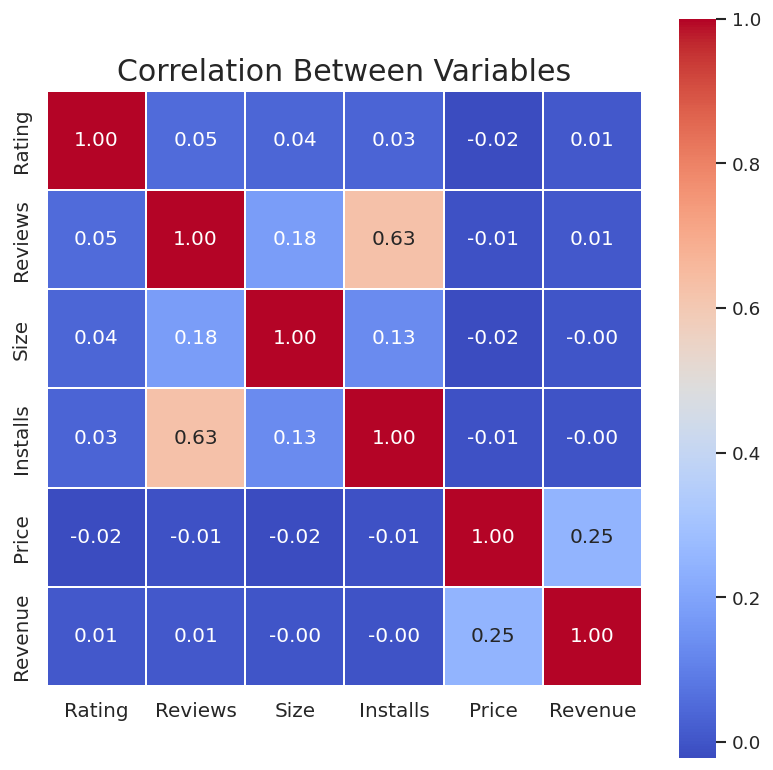

In [ ]:
# Let's plot a heatmap in order to find relation between our features

fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', cmap='coolwarm', square=True)

plt.title('Correlation Between Variables', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

Answer:

Displaying the streanth and direction of the relationship between two or more variable and it's useful for identifying correlations and patterns in high-dimensional datasets.

##### 2. What is/are the insight(s) found from the chart?


1) Number of Installs and number of reviews are positive correlated that means as the number of installs increases, the number of reviews tends to increase as well, and as the number of installs decreases, the number of reviews tends to decrease as well.

2) Size and other factors do not strongly correlate: With correlation values ranging from -0.02 to 0.18, the heatmap reveals that the Size of the app has a poor link with other factors like Rating, Reviews, Installs, and Price. This indicates that the app's size might not strongly affect its rating, number of reviews, installs, or price.


## Chart 16 ---> Pair Plot

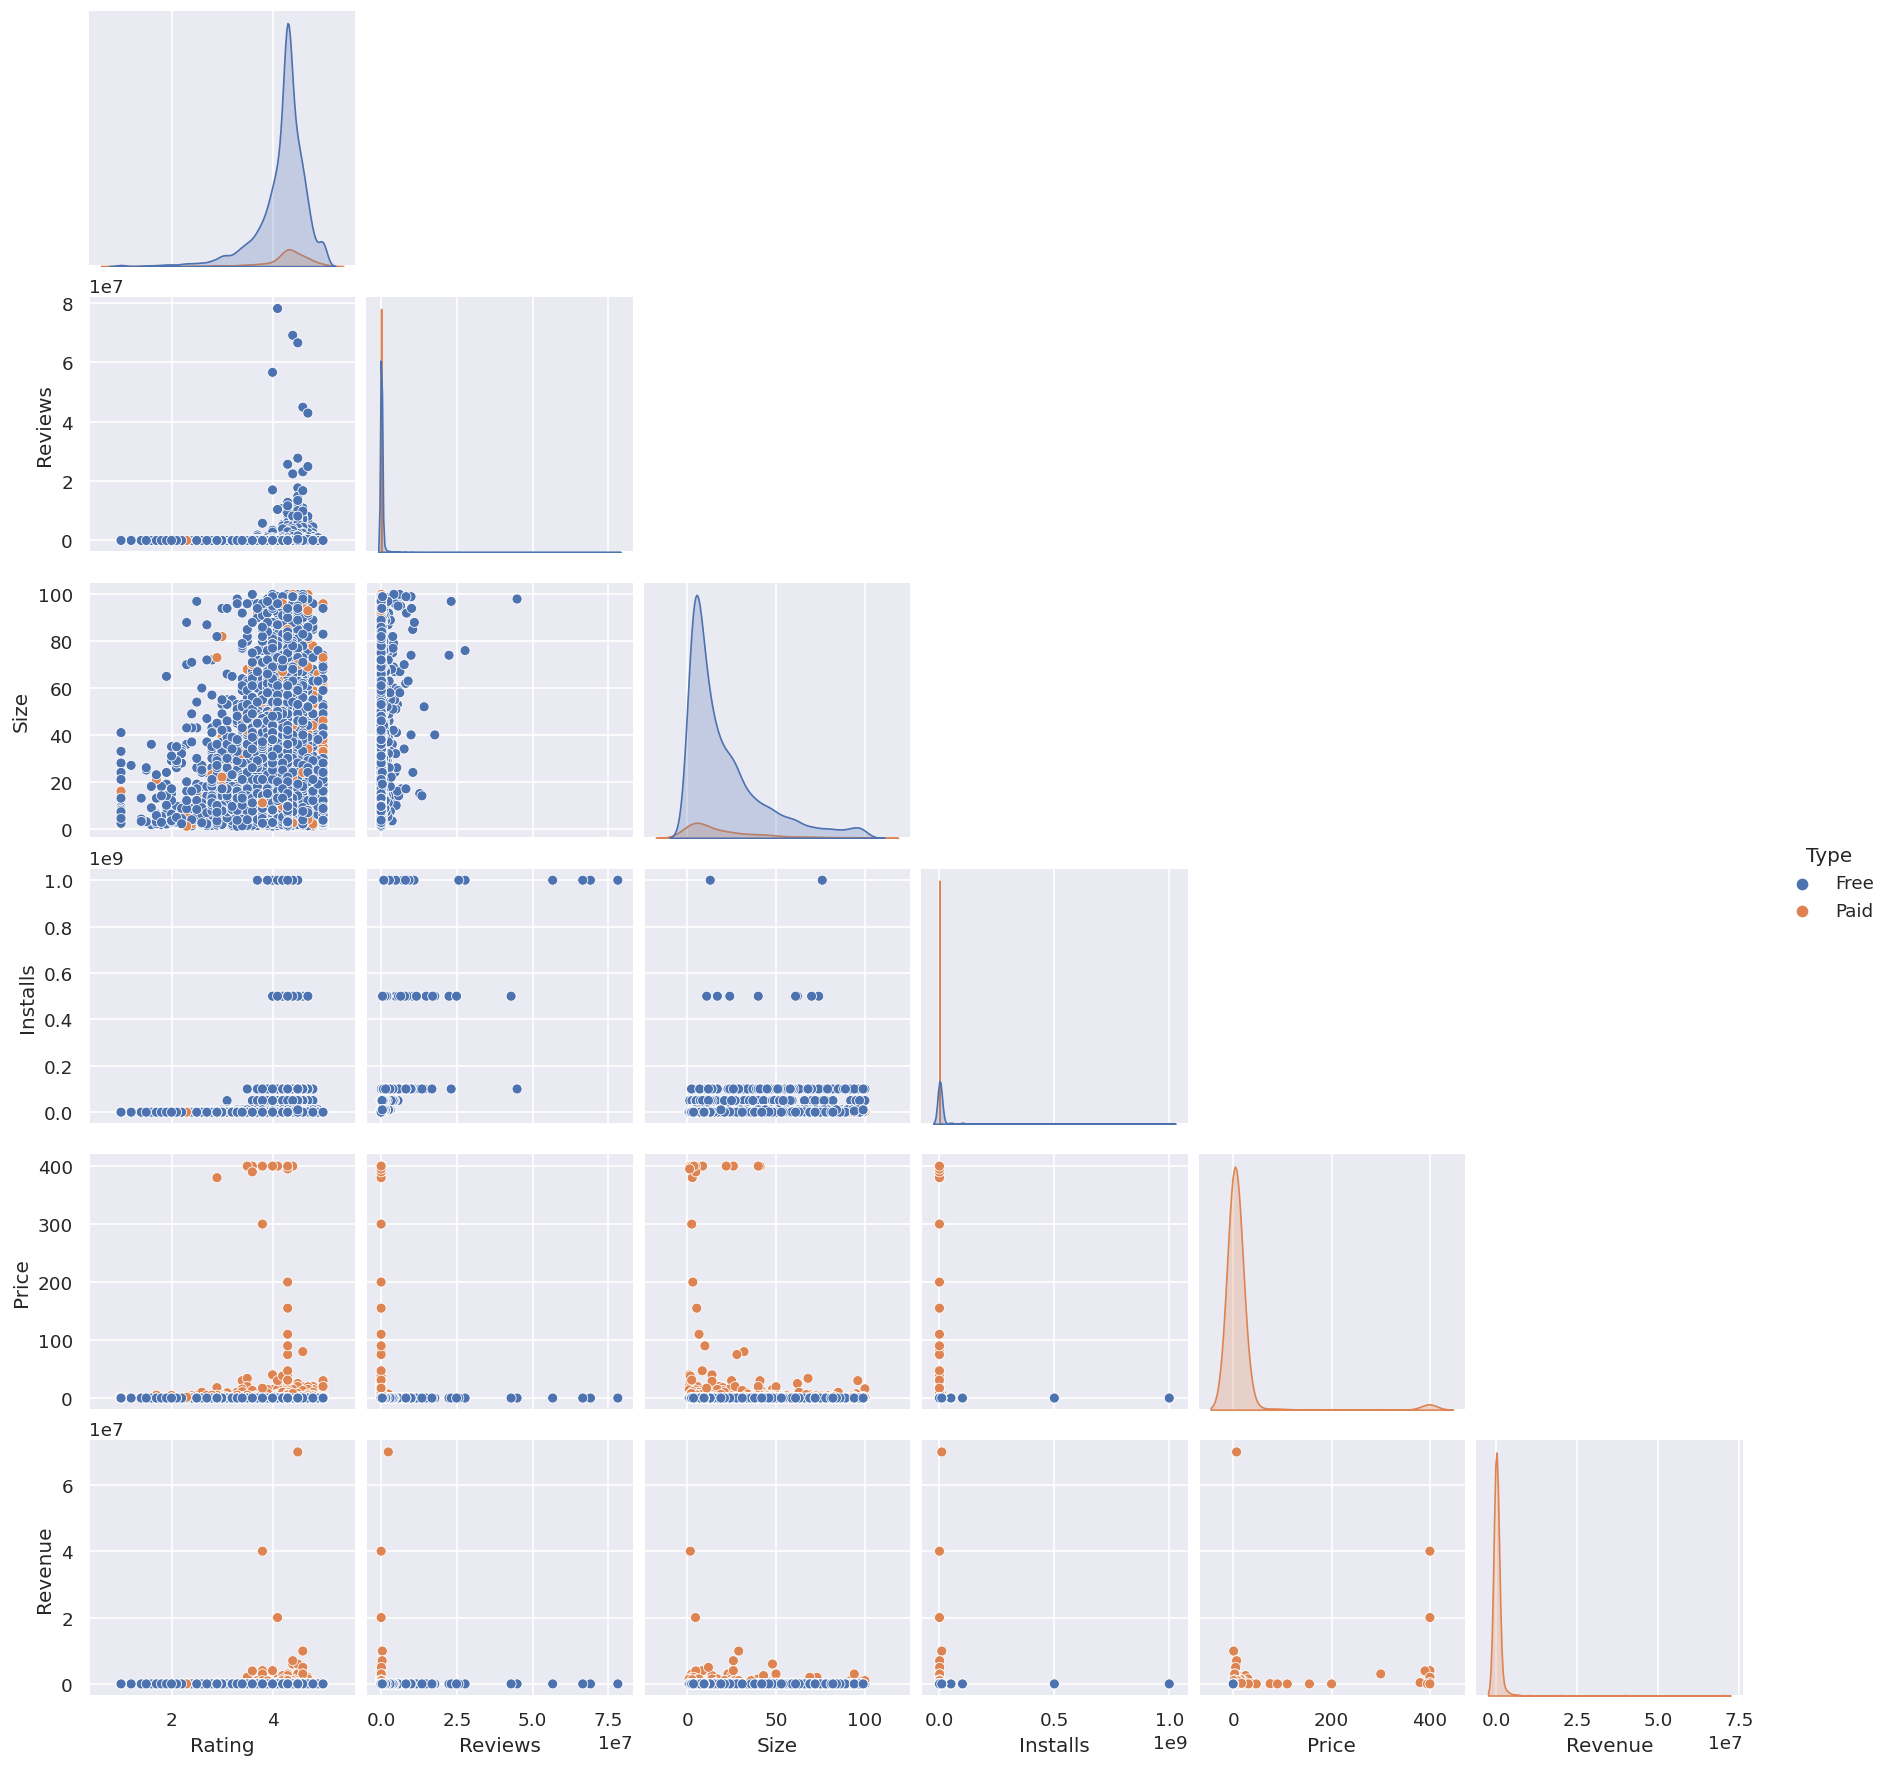

In [ ]:
# Let's visualize Pair Plot visualization code

sns.pairplot(df, hue="Type",corner=True)

##### 1. Why did you pick the specific chart?

Answer:

With the help of pairplot we can easily plot multiple graphs to observe relationship with different varaiables like rating, reviews, size, installs, price.

##### 2. What is/are the insight(s) found from the chart?

1.  Apps which are small in size are available free on Play store.

2.  Most of the apps have rating ranges from 3.5 to 4.5

## Chart 17 ---> Top apps with the highest number of POSITIVE reviews and categories.

In [ ]:
# Let's Enlisting top apps with positive reviews
Positive_sent = df1[df1['Sentiment']=='Positive']

# sorting positive sentiment dataset in descending order
top_10_positive = Positive_sent.groupby('App')[['Sentiment']].count().sort_values(by='Sentiment',ascending=False).reset_index().head(10)

In [ ]:
# Let's top 10 apps with highest positive reviews
top_10_positive

,App,Sentiment
0,Helix Jump,209
1,Duolingo: Learn Languages Free,200
2,Calorie Counter - Macros,174
3,Calorie Counter - MyFitnessPal,169
4,Bowmasters,169
5,10 Best Foods for You,162
6,Google Photos,143
7,8fit Workouts & Meal Planner,137
8,Garena Free Fire,136
9,DRAGON BALL LEGENDS,127


In [ ]:
# Let's Create a horizontal bar chart of the top 10 apps with highest positive sentiment based on reviews
fig = px.bar(top_10_positive, x='Sentiment', y='App', title='Top 10 Apps with Highest Positive Sentimental Reviews',
             orientation='h', width=800, height=500, color='Sentiment',
             color_continuous_scale=px.colors.sequential.Greens,)
fig.show()


##### 1. Why did you pick the specific chart?

Answer:

Comparing data across categories. it's good for displying discrete data (sentiments)

##### 2. What is/are the insight(s) found from the chart?

Answer:

1) App with most positive sentiments = Helix jump
2) From the list of top 10 app, Drogon ball legneds having least number of positive reviews

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.




Answer:

**Postive Impact:** From the data given above it is clearly visible that most of  the app from top 10 positively reviewed list belongs to GAME and HEALTH_AND_FITNESS category.

**Negative Impact**: The graph doesn't indicate any clear negative business impact, but in order to prevent bad reviews and low rating.


## Chart 18 --->  Top apps with the highest number of NEGATIVE reviews and categories.

In [ ]:
#  Enlisting top apps with neative reviews
Negative_sent=df1[df1['Sentiment']=='Negative']
top_10_negative=Negative_sent.groupby('App')[['Sentiment']].count().sort_values(by='Sentiment',ascending=False).reset_index().head(10)

In [ ]:
# top 10 apps with most negative reviews
top_10_negative

,App,Sentiment
0,Angry Birds Classic,147
1,Candy Crush Saga,126
2,Bowmasters,119
3,8 Ball Pool,106
4,Candy Crush Soda Saga,96
5,Garena Free Fire,81
6,Cooking Fever,79
7,Alto's Adventure,72
8,Block Puzzle,71
9,Agar.io,66


In [ ]:
# to get negative reviews apps list
app_list_negative=top_10_negative['App'].tolist()
print(app_list_negative)

['Angry Birds Classic', 'Candy Crush Saga', 'Bowmasters', '8 Ball Pool', 'Candy Crush Soda Saga', 'Garena Free Fire', 'Cooking Fever', "Alto's Adventure", 'Block Puzzle', 'Agar.io']


In [ ]:
app_list_negative

['Angry Birds Classic',
 'Candy Crush Saga',
 'Bowmasters',
 '8 Ball Pool',
 'Candy Crush Soda Saga',
 'Garena Free Fire',
 'Cooking Fever',
 "Alto's Adventure",
 'Block Puzzle',
 'Agar.io']

In [ ]:
# Let's get apps list
app_list=top_10_positive['App'].tolist()
print(app_list)

['Helix Jump', 'Duolingo: Learn Languages Free', 'Calorie Counter - Macros', 'Calorie Counter - MyFitnessPal', 'Bowmasters', '10 Best Foods for You', 'Google Photos', '8fit Workouts & Meal Planner', 'Garena Free Fire', 'DRAGON BALL LEGENDS']


## Chart 19 ---> Top 10 Apps with Highest Negative Sentimental Reviews

In [ ]:
# Let's get list of categories for specific app
category_list_negative=[]
for i in app_list:
  category_list_negative.append(df[df['App']==i].iloc[0,1])
print(category_list_negative)

['GAME', 'EDUCATION', 'HEALTH_AND_FITNESS', 'HEALTH_AND_FITNESS', 'GAME', 'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'HEALTH_AND_FITNESS', 'GAME', 'GAME']


In [ ]:
# Let's add new column 'Category' in top 10 negative app reviews dataframe
top_10_negative['Category']=category_list_negative

In [ ]:
# Let's create Dataframe with top 10 apps with negative reviews along with category
top_10_negative

,App,Sentiment,Category
0,Angry Birds Classic,147,GAME
1,Candy Crush Saga,126,EDUCATION
2,Bowmasters,119,HEALTH_AND_FITNESS
3,8 Ball Pool,106,HEALTH_AND_FITNESS
4,Candy Crush Soda Saga,96,GAME
5,Garena Free Fire,81,HEALTH_AND_FITNESS
6,Cooking Fever,79,PHOTOGRAPHY
7,Alto's Adventure,72,HEALTH_AND_FITNESS
8,Block Puzzle,71,GAME
9,Agar.io,66,GAME


In [ ]:
# Let's Create a horizontal bar chart of the top 10 apps with most negative sentiment based on reviews
fig = px.bar(top_10_negative, x='Sentiment', y='App', title='Top 10 Apps with Highest Negative Sentimental Reviews',
             orientation='h', width=800, height=500,color='Sentiment',
             color_continuous_scale=px.colors.sequential.Reds)
fig.show()

##### 1. Why did you pick the specific chart?

Answer:

A bar chart allows viewers to easily compare the number of Negative reviews for top 10 apps. The viewer can quickly see which app have highest number of Negative sentiments.

##### 2. What is/are the insight(s) found from the chart?

Answer:
1. App with most negative sentiments= Angry Birds Classic (147 Negative reviews)
2. From the list of top 10 apps, Agar.io having least number of Negative reviews(66 reviews)
3. The top 10 games with the highest number of Negative reviews are all in the "GAME" category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answer:

Positive Impact:
Game developers can use insights to improve their game quality and address user issues, which indirectly leads to increased downloads and positive reviews.

Negative Impact:
Users may uninstall the game and switch to a better alternative, leading to a decrease in downloads and revenue. If reviews are not taken seriously, this could have a negative impact.

## Chart 20 ---> Distribution of type of reviews

In [ ]:
# Let's Merg both DataFrame in order to explore some other important things

merged_df = df1.merge(df, on = 'App')

In [ ]:
# RANDOM 10 ROWS

merged_df.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
44182,Flashlight & LED Torch,Very good,Positive,0.91,0.78,TOOLS,4.3,111507,NaN,10000000,Free,0.00,Everyone,Tools,"December 29, 2017",Varies with device,Varies with device,0.0
61134,HotelTonight: Book amazing deals at great hotels,"Found bed bugs hotel, immediately checked out....",Neutral,0.00,0.00,TRAVEL_AND_LOCAL,4.4,57573,NaN,5000000,Free,0.00,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,0.0
5284,All Events in City,Best buying tickets,Positive,1.00,0.30,EVENTS,4.0,3782,9.5,100000,Free,0.00,Everyone,Events,"June 12, 2018",8.4,4.0.3 and up,0.0
37467,Emmanuella Funny Videos 2018,NaN,NaN,NaN,NaN,COMICS,4.5,314,6.1,100000,Free,0.00,Everyone,Comics,"May 23, 2018",3.1.0,4.1 and up,0.0
15751,BlueJeans for Android,NaN,NaN,NaN,NaN,BUSINESS,3.9,1058,23.0,500000,Free,0.00,Everyone,Business,"June 29, 2018",2.22.397,5.0 and up,0.0
58471,Hello Kitty Nail Salon,"I bought carol's daughter, old phone stupid wo...",Negative,-0.35,0.60,GAME,4.2,369203,24.0,50000000,Free,0.00,Everyone,Casual;Pretend Play,"April 17, 2018",1.5,4.1 and up,0.0
17901,"BuzzFeed: News, Tasty, Quizzes",NaN,NaN,NaN,NaN,NEWS_AND_MAGAZINES,4.3,131028,13.0,5000000,Free,0.00,Teen,News & Magazines,"July 30, 2018",5.38,4.4 and up,0.0
16679,Breathing Zone,NaN,NaN,NaN,NaN,MEDICAL,4.6,319,NaN,5000,Paid,3.99,Everyone,Medical,"March 6, 2018",Varies with device,Varies with device,19950.0
19779,Calculator with Percent (Free),NaN,NaN,NaN,NaN,TOOLS,4.8,48211,7.4,1000000,Free,0.00,Everyone,Tools,"November 18, 2017",32.1,4.1 and up,0.0
37719,English Dictionary - Offline,NaN,NaN,NaN,NaN,BOOKS_AND_REFERENCE,4.4,341157,30.0,10000000,Free,0.00,Everyone 10+,Books & Reference,"March 20, 2018",3.9.1,4.2 and up,0.0


In [ ]:
# Let's make a new DataFrame of category and sentiment

category_sentiment = merged_df.groupby(['Category', 'Sentiment']).size().reset_index(name = 'Sentiment Count')

In [ ]:
# Let's count the sentiments

category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

## Chart 20 ---> Sentiment Analysis by Category

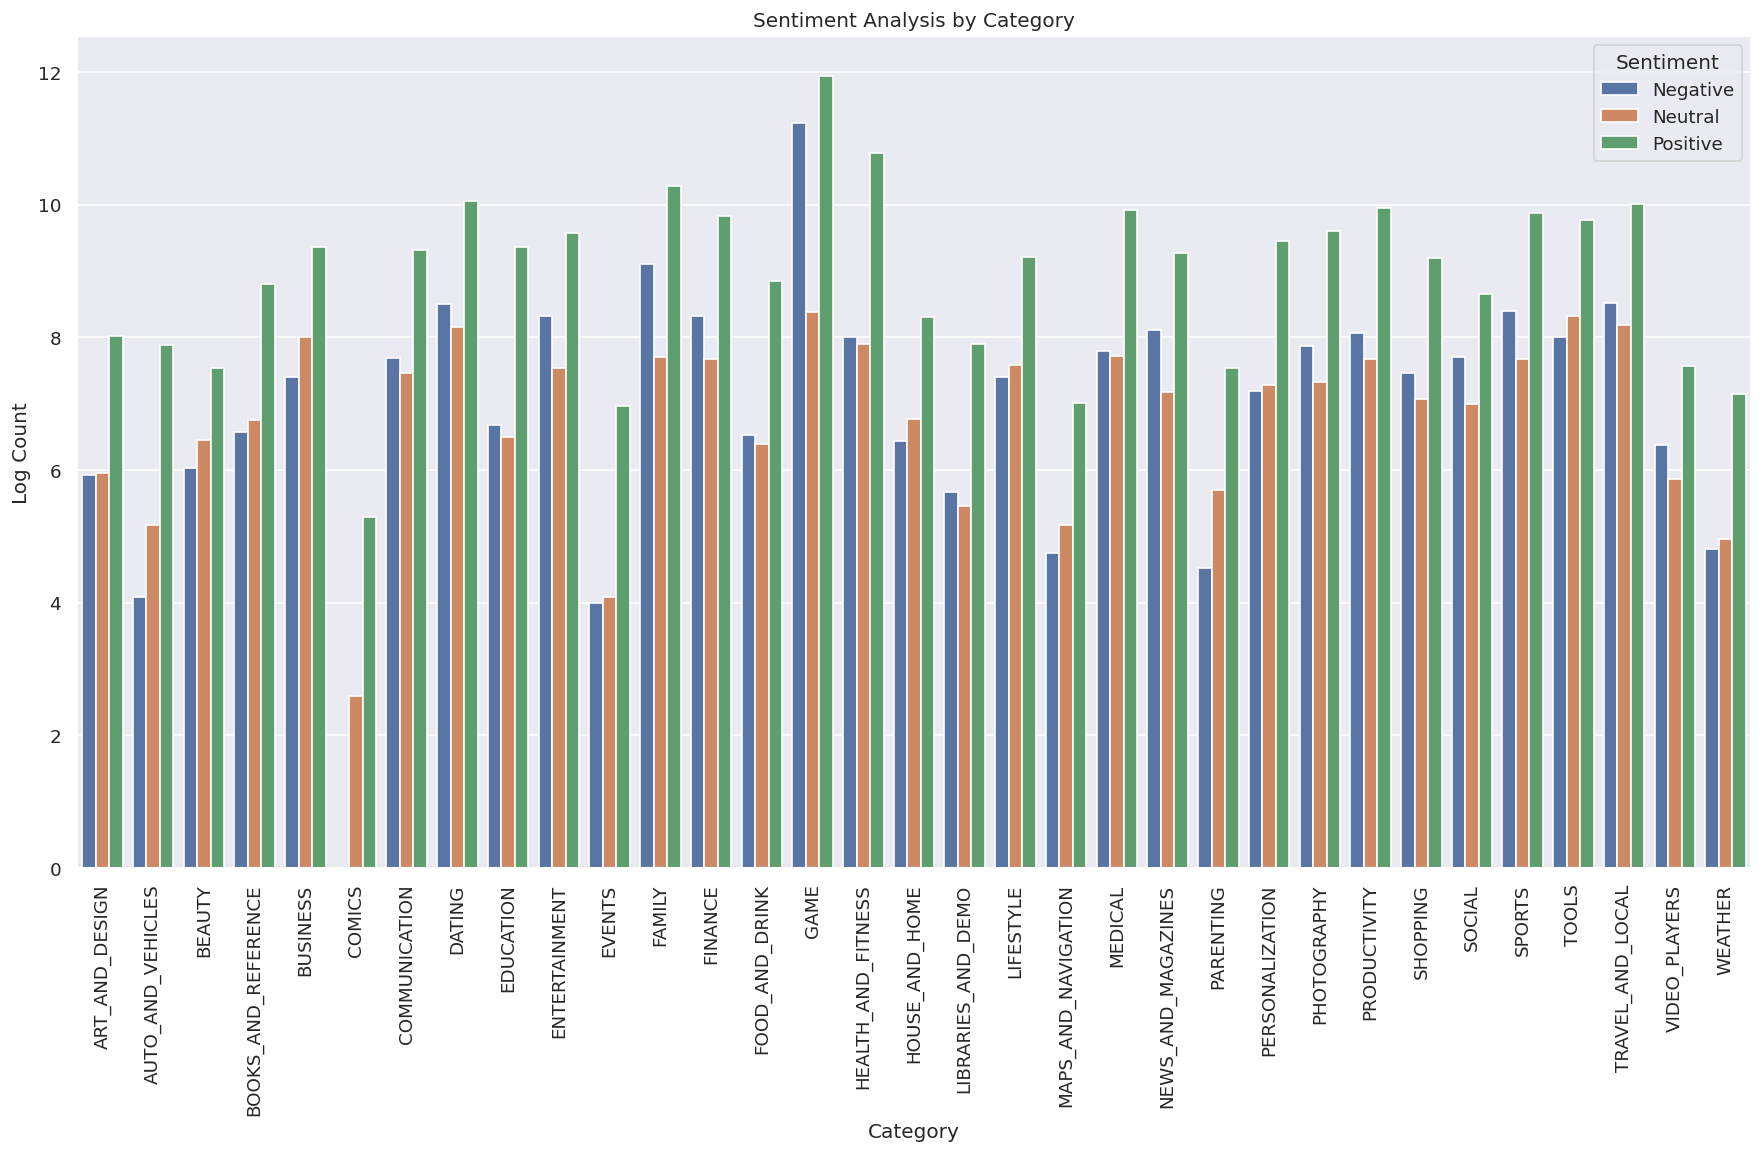

In [ ]:
# Let's Plot a graph Sentiment Analysis by Category.

plt.figure(figsize=(18, 9))

sns.barplot(x='Category', y='log_sentiment_count', hue='Sentiment', data=category_sentiment)

plt.xticks(rotation=90)
plt.title('Sentiment Analysis by Category')
plt.xlabel('Category')
plt.ylabel('Log Count')
plt.show()


##### 1. Why did you pick the specific chart?

Answer:

A bar chart allows viewers to easily compare the number of Negative reviews for top 10 apps.

##### 2. What is/are the insight(s) found from the chart?

Answer:


1) we can see most of the application they got positive sentiment.

2) we can see speacially in game genre have most positive as well as negative sentimentes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Positive Impact:

In every categories we can see positive sentiment is high. It's good to you see that

Negative Impact:

In most of the application we can see negative and neutral sentimets are not exactly but nearly same.


## Chart 21 ---> Percentage of Review Sentiments

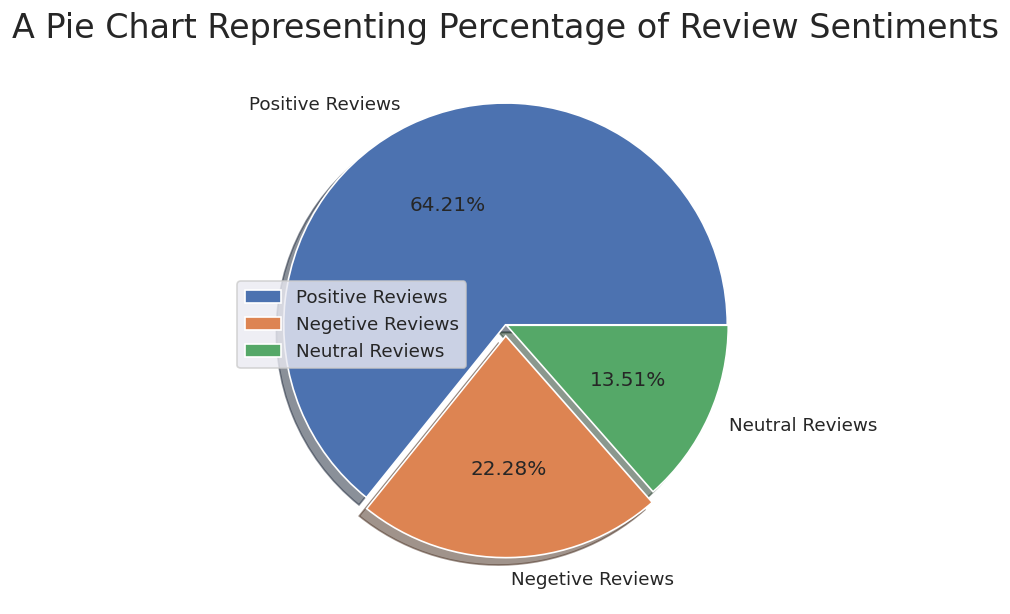

In [ ]:
# Let's plot graph A Pie Chart Representing Percentage of Review Sentiments.

counts = list(merged_df['Sentiment'].value_counts())

labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8,6)

plt.pie(counts, labels = labels, explode = [0, 0.05, 0.005], shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', size = 20)
plt.axis('off')
plt.legend()

plt.show()

##### 1. Why did you pick the specific chart?

Answer:

It's shows the proportion of each group as part of a whole.

##### 2. What is/are the insight(s) found from the chart?

In all over the Dataset the positive reviews are more negative and neutral reviews

##Summary Analysis

*
The most free app installed from play store are from Game, Communication, Social, Productivity,Tools categories.

* The most installed paid app are from finance and lifestyle.



# **Solution to our problem statement**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer:

* Focus on developing apps in the top app categories such as Games, Family, and Tools to achieve high demand and popularity among users.

* Increase the number of free apps to attract more users, as the majority of the apps on the Play Store are free.

* For paid apps, keep the price range within $2 to $10 to attract more users, as this is the most common price range for paid apps.

* Develop more apps for Android 4.0 and above, as this is the most popular Android version among users.

* Improve the quality and user experience of apps by taking into account the ratings and reviews of best performing apps in the same category.

* Consider developing apps in categories with higher average ratings, as this can potentially lead to more downloads and higher user satisfaction.

* Analyze the user feedback and incorporate relevant suggestions and feature requests in the app updates to improve the user experience and increase user retention.



# Conclusion

* As per we have seen some graph above, most of the trending apps are from the categories like GAME, COMMUNICATION and TOOL even though the amount of available apps from these categories are twice as much lesser then the category FAMILY
* 92% of apps available on Play store are FREE and only 8% of apps are PAID with 0.08% downloads.

* Playstore is a family friendly platform as 81.8% of apps are available for everyone.

* Just 53 apps fall under the BEAUTY category, while FAMILY(18.96%), GAME(9.90%) & TOOLS(8.56%) categories having the largest number of downloads.

* With 13878924398 downloads, GAME is the most popular category in terms of installs, whereas only 0.02% of the share belongs to EVENTS.

* With a 4.5 rating and over 27722264 downloads, **Subway Surfers** is the top-performing app in the GAME category.

#***Thank You....***